# (실습) matplotlib.pyplot 2부

**기본 설정**

In [1]:
import numpy as np

맷플롯립<font size='2'>Matplotlib</font>은 간단한 그래프 도구를 제공하는 라이브러리다. 
맷플롯립의 대부분의 함수는 파이플롯<font size='2'>pyplot</font> 모듈에 포함되어 있으며
관행적으로 `plt` 별칭으로 불러온다.

In [2]:
import matplotlib.pyplot as plt

## 분류 대 군집화

**분류**

각 데이터에 대해 하나의 레이블을 할당한다.
붓꽃의 꽃잎 길이와 너비를 특성으로 사용해서 
품종을 레이블로 사용한 결과를 그래프로 그려보자.

먼저 붓꽃 데이터 불러온다.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris() # load_iris(as_frane=False)
X = iris.data
y = iris.target

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

`X`, `y` 의 자료형은 넘파이 어레이다.

In [5]:
type(X)

numpy.ndarray

In [6]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
type(y)

numpy.ndarray

In [8]:
y[:5]

array([0, 0, 0, 0, 0])

품종 종류는 다음과 같다.

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

품종별 다른 색상으로 산점도를 그리기 위해
부울 인덱싱과 인덱싱을 함께 사용한다. 

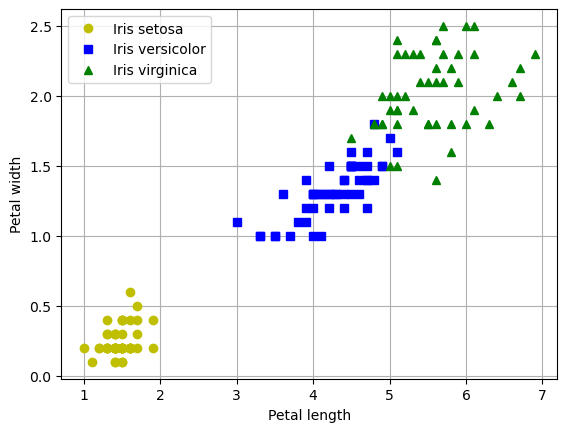

In [10]:
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.grid()

plt.show()

**군집화**

**군집**<font size='2'>cluster</font>은 유사한 대상들의 모음을 가리킨다.
예를 들어, 산이나 공원에서 볼 수 있는 이름은 모르지만 동일 품종의 꽃으로 이루어진 군집 등을
생각하면 된다.
**군집화**<font size='2'>clustering</font>는 대상들을 나누어 군집을 
형성하는 것을 말한다. 

각 샘플에 하나의 그룹을 할당한다는 점에서 분류와 유사하다.
하지만 각 샘플에 대해 레이블을 할당하는 게 아니라
유사한 샘플들의 군집으로 구분한다는 점에서 다르다.

아래 그림은 아이리스 붓꽃 데이터에 대한 군집화의 결과를 보여준다. 
분류는 세 개의 품종을 매우 잘 분류하지만 군집은 세토사 군집과 나머지 군집으로 구분할 뿐이다.

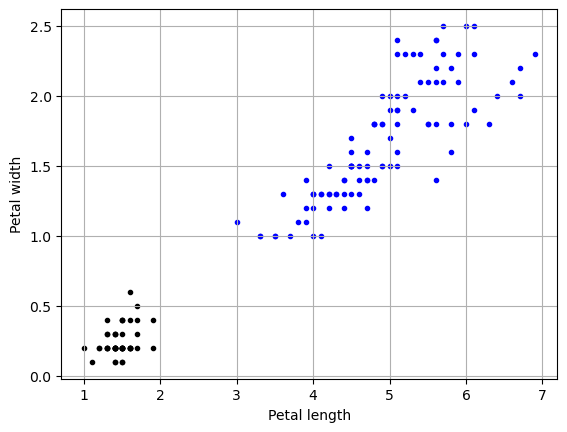

In [11]:
plt.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
plt.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()

plt.show()

## 서브플롯 활용

분류와 군집 그래프 여러 개를 동시에 그리기 위해 서브플롯을 활용하는
세 가지 방식을 소개한다.

**방식 1: `Figure` 객체의 `add_subplot()` 메서드 활용**

`add_subplot()` 함수의 반환값은 `Axes` 객체다.
`Axes` 객체는 그래프와 관련된 많은 기능을 지원한다.

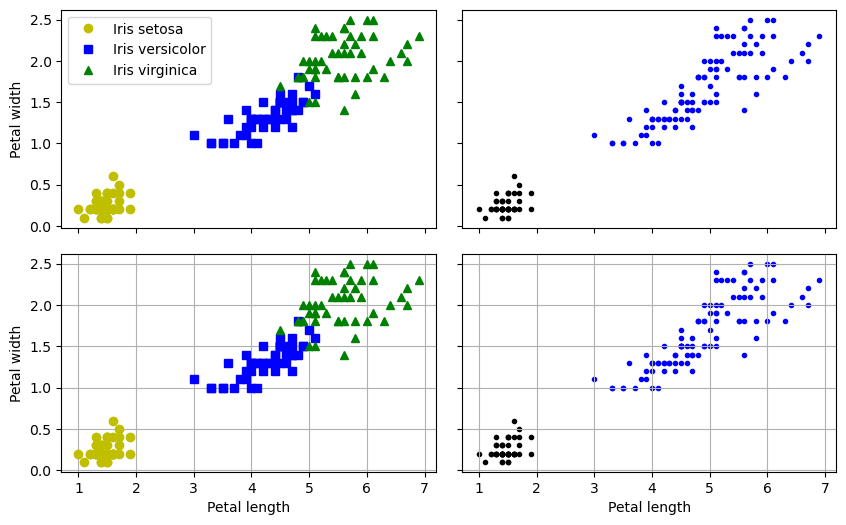

In [12]:
plt.rc('figure', figsize=(10, 6))

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax1.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax1.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax1.set_ylabel("Petal width")
ax1.tick_params(labelbottom=False)
ax1.legend()

ax2.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
ax2.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
ax2.tick_params(labelleft=False, labelbottom=False)

ax3.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax3.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax3.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax3.set_xlabel("Petal length")
ax3.set_ylabel("Petal width")
ax3.grid()

ax4.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
ax4.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
ax4.set_xlabel("Petal length")
ax4.tick_params(labelleft=False)
ax4.grid()

fig.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백
# plt.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()

**방식 2: `plt.subplots()` 함수와 `Axes` 객체 활용**

`plt.subplots()` 함수의 반환값은 `Figure` 객체와 `Axes` 객체의 어레이로 구성된 튜플이다.

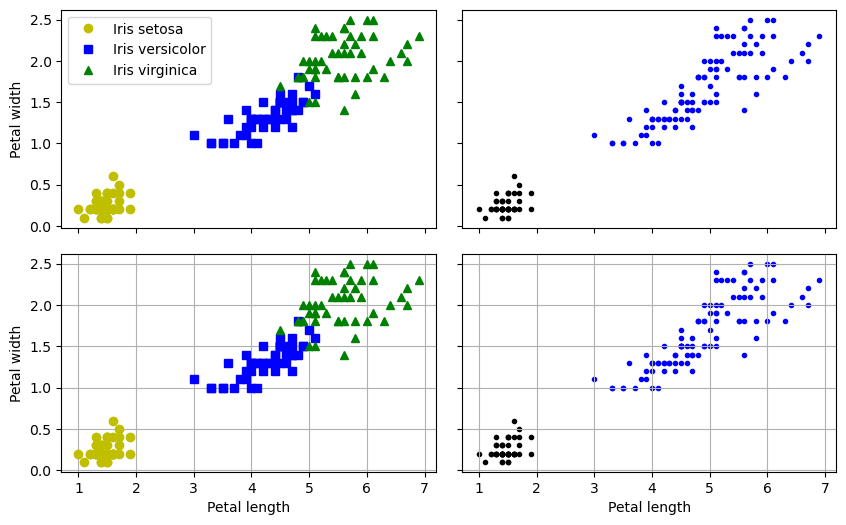

In [13]:
plt.rc('figure', figsize=(10, 6))

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

axes[0, 0].plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
axes[0, 0].plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
axes[0, 0].plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
axes[0, 0].set_ylabel("Petal width")
axes[0, 0].legend()

axes[0, 1].scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
axes[0, 1].scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")

axes[1, 0].plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
axes[1, 0].plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
axes[1, 0].plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
axes[1, 0].set_xlabel("Petal length")
axes[1, 0].set_ylabel("Petal width")
axes[1, 0].grid()

axes[1, 1].scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
axes[1, 1].scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
axes[1, 1].set_xlabel("Petal length")
axes[1, 1].grid()

fig.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백
# plt.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()

**방식 3: `plt.subplot()` 함수와 `Axes` 객체 활용**

`plt.subplot()` 함수는 `Figure` 객체에 `Axes` 객체를 하나 추가한다.
해당 `Axes` 객체에 대한 설정은 바로 실행해야 한다.

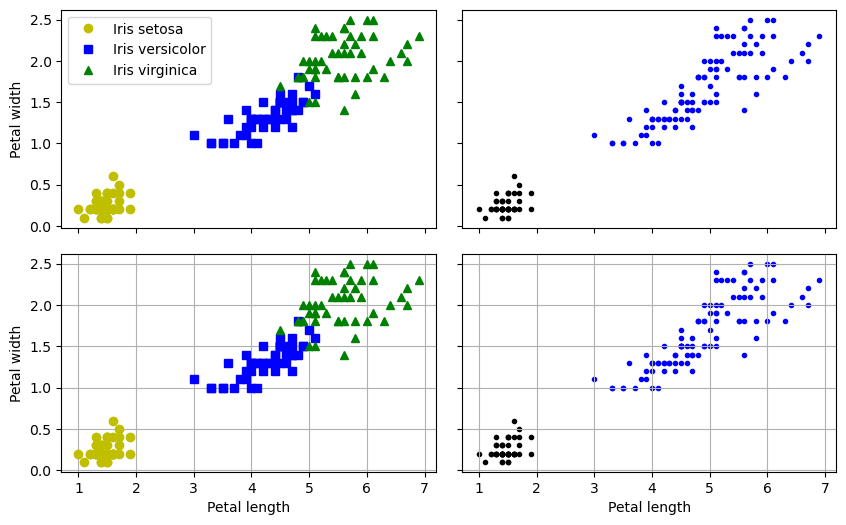

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.ylabel("Petal width")
plt.tick_params(labelbottom=False)
plt.legend()

plt.subplot(222)
plt.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
plt.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(223)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()

plt.subplot(224)
plt.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
plt.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.grid()

plt.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()

다음과 같이 `Axes` 객체를 변수에 할당하고 활용할 수도 있다.

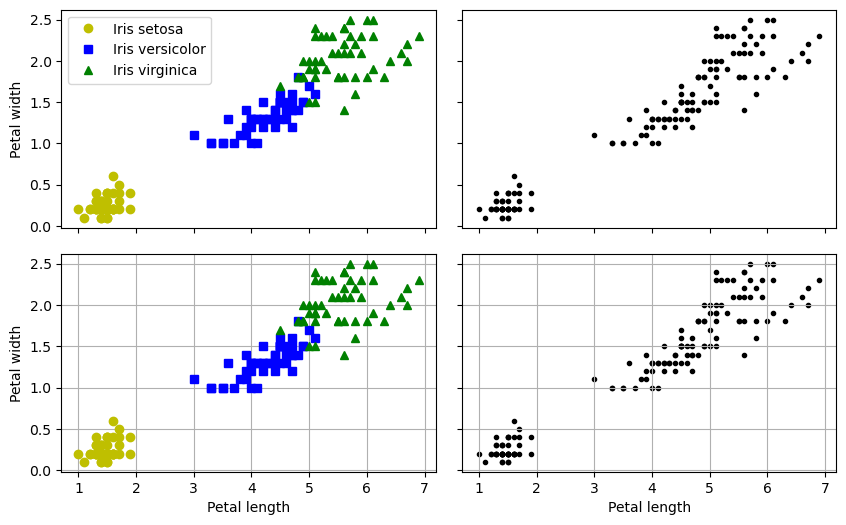

In [15]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(221)
ax1.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax1.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax1.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax1.set_ylabel("Petal width")
ax1.tick_params(labelbottom=False)
ax1.legend()

ax2 = plt.subplot(222)
ax2.scatter(X[:, 2], X[:, 3], c="k", marker=".")
ax2.tick_params(labelleft=False, labelbottom=False)

ax3 = plt.subplot(223)
ax3.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax3.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax3.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax3.set_xlabel("Petal length")
ax3.set_ylabel("Petal width")
ax3.grid()

ax4 = plt.subplot(224)
ax4.scatter(X[:, 2], X[:, 3], c="k", marker=".")
ax4.set_xlabel("Petal length")
ax4.tick_params(labelleft=False)
ax4.grid()

plt.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()